# Parte 2 - Pregunta Práctica

Marco Jurado 20308

Cristian Aguirre 20231

In [1]:
import numpy as np

np.random.seed(2023)

# Parametros de simulacion
num_simulations = 1000  # Numero de iteraciones
investment_horizon = 5  # Horizonte de inversión en años
discount_rate = 0.1  # Tasa de descuento

def simulate_cash_flows(params):
    interest_rate, volatility = params
    cash_flows = np.random.normal(500000, 100000, size=(investment_horizon))
    discounted_cash_flows = cash_flows / (1 + interest_rate) ** np.arange(1, investment_horizon + 1)
    npv = np.sum(discounted_cash_flows)
    return npv

Prompt utilizado para integrar un análisis de sensibilidad global utilizando indices sobol

https://chat.openai.com/share/445c862d-2165-4f7e-a2b7-adb5e17df7e7

NOTA: Se tuvieron que hacer modificaciones para integrarlo con nuestra simulación

In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol

problem = {
    'num_vars': 2,
    'names': ['Interest Rate', 'Volatility'],
    'bounds': [[0.08, 0.12], [0.15, 0.25]]
}

param_values = saltelli.sample(problem, num_simulations)

Y = np.array([simulate_cash_flows(params) for params in param_values])

Si = sobol.analyze(problem, Y)

print('Índices de Sobol:')
print('Tasa de Interés:', Si['S1'][0])
print('Volatilidad:', Si['S1'][1])


Índices de Sobol:
Tasa de Interés: 0.11892799306837044
Volatilidad: 0.04938607843531488


C:\Users\Cristian Aguirre\AppData\Local\Temp\ipykernel_3596\4026482892.py:10: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, num_simulations)
c:\Users\Cristian Aguirre\AppData\Local\Programs\Python\Python310\lib\site-packages\SALib\sample\saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


Contribución total de las variables

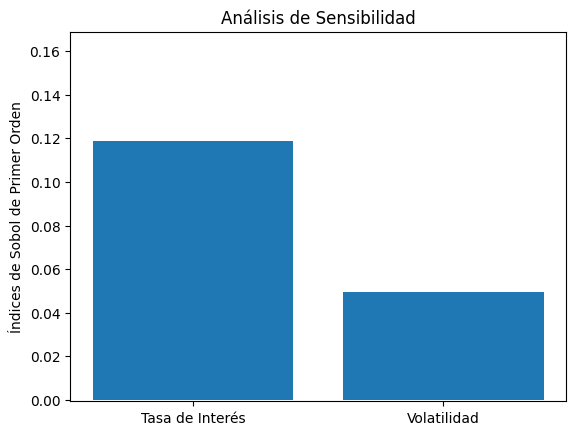

In [3]:
import matplotlib.pyplot as plt

# Los índices de Sobol calculados
S1 = [Si['S1'][0], Si['S1'][1]]
# Los nombres de las variables
param_names = ['Tasa de Interés', 'Volatilidad']

# Crear el gráfico de barras
plt.bar(param_names, S1)

# Añadir etiquetas y título
plt.ylabel('Índices de Sobol de Primer Orden')
plt.title('Análisis de Sensibilidad')
plt.ylim(min(S1)-0.05, max(S1)+0.05)  # Para asegurarnos de que las barras se visualicen correctamente

# Mostrar el gráfico
plt.show()


**1. ¿Qué tanto influye cada variable en el VPN?**

De acuerdo con los resultados mostrados en la gráfica podemos ver que la tasa de interés está influyendo en un 11.89% de la varianza del VAN y la volatilidad en un 4.93%. 

**2. ¿Qué variable influye más? ¿Por qué cree que es esto?**

Como se mencionó anteriormente, la variable que más influye es la tasa de interés y llegamos a la conclusión de que esto se debe a la forma en que la tasa de interés afecta directamente al descuento de los flujos de caja en el cálculo del VAN. Un cambio en la tasa de interés tiene un impacto directo en el valor presente de los flujos de caja futuros, mientras que la volatilidad, que afecta la dispersión de los flujos de efectivo, podría tener un impacto menos directo en el VAN.

**3. ¿Hay una diferencia significativa en la influencia de cada variable? ¿Por qué?**

Sí, si hay una diferencia significativa en la influencia de cada variable ya que la tasa de interés influye en la varianza del VAN el doble de lo que lo hace la volatilidad. Como se mencionó en el enunciado anterior, esto se puede deber a la forma en la que se está calculando el VPN pues la tasa de interés afecta en el descuento del flujo de caja de manera directa. 

**4. Si tuviera que hacer mejoras al análisis ¿qué podría hacer?**

Las mejoras que se le puedan hacer a un modelo depende mucho de lo que queremos conseguir y los resultados que queremos obtener, para este caso práctico considero que el modelo cumple satisfactoriamente con los requerimentos que necesitabamos y obtuvimos buenos resultados, sin embargo siempre podemos mejorar algunos aspectos, como los siguientes.

- Analizar Interacciones: Considera calcular los índices de Sobol de segundo orden para estudiar cómo combinaciones de variables, como tasa de interés y volatilidad, influyen conjuntamente en el VAN.

- Mayor Número de Simulaciones: Aumentar las simulaciones puede ofrecer estimaciones más precisas de los índices, especialmente en sistemas con alta complejidad.

- Convergencia de Índices: Realiza un análisis de convergencia para asegurarte de que la cantidad de muestras es adecuada y que los índices de Sobol están estabilizándose.

- Análisis de Sensibilidad Local: Además del enfoque global, evalúa cómo pequeñas variaciones en las entradas cerca de puntos específicos afectan el VAN, para un entendimiento más detallado.

- Validación del Modelo: Es vital asegurarse de que tu modelo refleja adecuadamente la realidad y las dinámicas de los flujos de efectivo y del VAN.